# Hough 变换

hough变换的基本原理是：

1. 将图像利用canny算子进行边缘检测，将图像的边缘勾画出来。
2. 利用图像边缘上的点，将这些点映射到新的参数空间中，每个点映射成一条连续的曲线（理想情况，实际中是离散取值的）。
3. 根据曲线的交点，交点越多的点既代表了对应的特征图形。
4. 将交点返回到原图像中。

# 边缘检测与canny算子

## Sobel和Laplacian算子

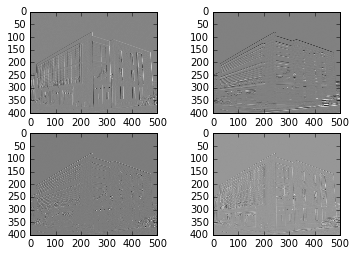

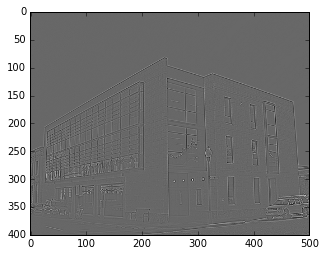

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('building.jpg',0)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)#默认ksize=3
sobely = cv2.Sobel(img,cv2.CV_64F,0,1)
sobelxy = cv2.Sobel(img,cv2.CV_64F,1,1)
laplacian = cv2.Laplacian(img,cv2.CV_64F)#默认ksize=3
#人工生成一个高斯核，去和函数生成的比较
kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]],np.float32)#
img1 = np.float64(img)#转化为浮点型的
img_filter = cv2.filter2D(img1,-1,kernel)
sobelxy1 = cv2.Sobel(img1,-1,1,1)

plt.subplot(221),plt.imshow(sobelx,'gray')
plt.subplot(222),plt.imshow(sobely,'gray')
plt.subplot(223),plt.imshow(sobelxy,'gray')
plt.subplot(224),plt.imshow(laplacian,'gray')

plt.figure()
plt.imshow(img_filter,'gray')

## Canny算子

(<matplotlib.axes._subplots.AxesSubplot at 0x295a154b6a0>,
 <matplotlib.image.AxesImage at 0x295a32e0358>)

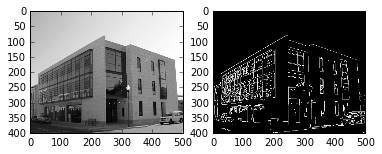

In [37]:
img = cv2.imread('building.jpg',0)
edges = cv2.Canny(img,100,200)#其他的默认
plt.subplot(121),plt.imshow(img,'gray')
plt.subplot(122),plt.imshow(edges,'gray')

# 直线检测

## HoughLines

(<matplotlib.image.AxesImage at 0x295beabe358>, [])

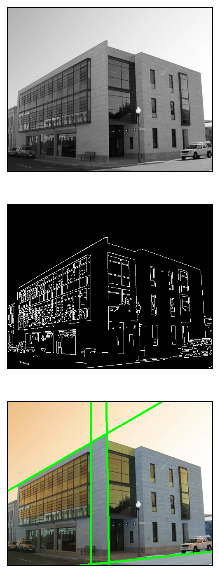

In [104]:
img = cv2.imread('building.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#灰度图像 
edges = cv2.Canny(gray,100,200) #canny算子进行边缘检测

lines = cv2.HoughLines(edges,1,np.pi/180,160)  #hough线
lines1 = lines[:,0,:]#提取为为二维
for rho,theta in lines1[:]:   #在图形上把线找出来
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a)) 
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),3)

f, (ax1, ax2,ax3) = plt.subplots(3, 1,figsize=(10,10))
ax1.imshow(gray,'gray'),plt.setp(ax1, xticks=[], yticks=[])
ax2.imshow(edges,'gray'),plt.setp(ax2, xticks=[], yticks=[])
ax3.imshow(img),plt.setp(ax3, xticks=[], yticks=[])

## HoughLineP

采取一种概率挑选机制，不是所有的点都计算，而是随机的选取一些个点来计算，相当于降采样了。这样的话我们的阈值设置上也要降低一些。

(<matplotlib.image.AxesImage at 0x295bf112630>, [])

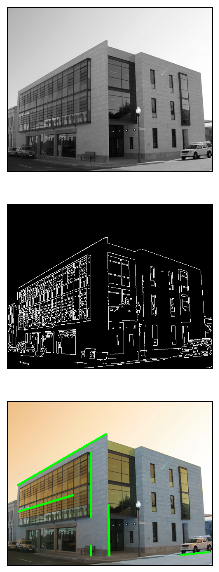

In [115]:
img = cv2.imread('building.jpg') 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#灰度图像 
edges = cv2.Canny(gray,50,200)
#霍夫变换
lines = cv2.HoughLinesP(edges,1,np.pi/180,150,minLineLength=10,maxLineGap=10)
lines1 = lines[:,0,:]#提取为二维
for x1,y1,x2,y2 in lines1[:]: 
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),3)
#画图
f, (ax1, ax2,ax3) = plt.subplots(3, 1,figsize=(10,10))
ax1.imshow(gray,'gray'),plt.setp(ax1, xticks=[], yticks=[])
ax2.imshow(edges,'gray'),plt.setp(ax2, xticks=[], yticks=[])
ax3.imshow(img),plt.setp(ax3, xticks=[], yticks=[])

# 圆检测

cv2.HoughCircles(image, method, dp, minDist, circles, param1, param2, minRadius, maxRadius) 
这个时候输入为灰度图像，同时最好规定检测的圆的最大最小半径，不能盲目的检测，否侧浪费时间空间。输出就是三个参数空间矩阵。 

(<matplotlib.image.AxesImage at 0x295c8a324a8>, [])

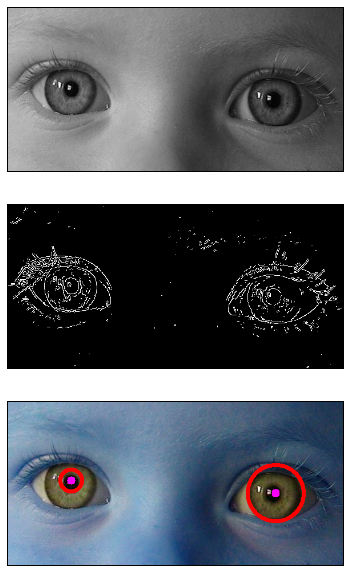

In [156]:
img = cv2.imread('eyes.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#灰度图像 
edges = cv2.Canny(gray,90,100)

#hough transform
circles1 = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,100,param1=100,param2=25,minRadius=3,maxRadius=70)
circles = circles1[0,:,:]#提取为二维
circles = np.uint16(np.around(circles))#四舍五入，取整
for i in circles[:]: 
    cv2.circle(img,(i[0],i[1]),i[2],(255,0,0),5)#画圆
    cv2.circle(img,(i[0],i[1]),2,(255,0,255),10)#画圆心

f, (ax1, ax2,ax3) = plt.subplots(3, 1,figsize=(10,10))
ax1.imshow(gray,'gray'),plt.setp(ax1, xticks=[], yticks=[])
ax2.imshow(edges,'gray'),plt.setp(ax2, xticks=[], yticks=[])
ax3.imshow(img),plt.setp(ax3, xticks=[], yticks=[])

    
# plt.subplot(121),plt.imshow(gray,'gray')
# plt.xticks([]),plt.yticks([])

# plt.subplot(122),plt.imshow(img)
# plt.xticks([]),plt.yticks([])

# 参考文献

1. http://blog.csdn.net/on2way/article/details/46851451
2. http://blog.csdn.net/on2way/article/details/47028969